# load and clean the Application data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.get_option("display.max_columns",None)
pd.get_option("display.max_rows", None)
import seaborn as sns
from scipy import stats

In [2]:
app = pd.read_csv('credit_application_data.csv')

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app.shape

(307511, 122)

## Reduce columns to the ones that will be needed later. 

# DROP data about living circumstances
- Name_Type_Suite = who accompanyed the client when he/she applied. 
- REGION_RATING_CLIENT, REGION_RATING_CLIENT = region rating of bank.
- EXT_SOURCE_1-3 = Normalized score from external source
- APARTMENTS_AVG
- BASEMENTAREA_AVG
- YEARS_BEGINEXPLUATATION_AVG
- YEARS_BUILD_AVG
- COMMONAREA_AVG
- ELEVATORS_AVG
- ENTRANCES_AVG
- FLOORSMAX_AVG
- FLOORSMIN_AVG
- LANDAREA_AVG
- LIVINGAPARTMENTS_AVG
- LIVINGAREA_AVG
- NONLIVINGAPARTMENTS_AVG
- NONLIVINGAREA_AVG
- APARTMENTS_MODE
- BASEMENTAREA_MODE
- YEARS_BEGINEXPLUATATION_MODE
- YEARS_BUILD_MODE
- COMMONAREA_MODE
- ELEVATORS_MODE
- ENTRANCES_MODE
- FLOORSMAX_MODE
- FLOORSMIN_MODE
- LANDAREA_MODE
- LIVINGAPARTMENTS_MODE
- LIVINGAREA_MODE
- NONLIVINGAPARTMENTS_MODE
- NONLIVINGAREA_MODE
- APARTMENTS_MEDI
- BASEMENTAREA_MEDI
- YEARS_BEGINEXPLUATATION_MEDI
- YEARS_BUILD_MEDI
- COMMONAREA_MEDI
- ELEVATORS_MEDI
- ENTRANCES_MEDI
- FLOORSMAX_MEDI
- FLOORSMIN_MEDI
- LANDAREA_MEDI
- LIVINGAPARTMENTS_MEDI
- LIVINGAREA_MEDI
- NONLIVINGAPARTMENTS_MEDI
- NONLIVINGAREA_MEDI
- FONDKAPREMONT_MODE
- HOUSETYPE_MODE
- TOTALAREA_MODE
- WALLSMATERIAL_MODE
- EMERGENCYSTATE_MODE 


In [5]:
app = app.drop(['WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','NAME_TYPE_SUITE',\
                        'REGION_RATING_CLIENT','REGION_RATING_CLIENT','EXT_SOURCE_1','EXT_SOURCE_2',\
                        'EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',\
                        'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',\
                        'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG',\
                        'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',\
                        'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',\
                        'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE',\
                        'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',\
                        'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI',\
                        'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI',\
                        'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI',\
                        'FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE'],axis = 1)
    
app.shape

(307511, 70)

### --> This reduced the columns from 122 to 70. 

# Data Quality and Missing Values

In [6]:
app_null = app.isnull().sum()*100/len(app)
app_null = app_null.sort_values(ascending = False)

In [7]:
print(f'The largest % of null values in a column: {round(max(app_null[app_null>0]),2)}%')
print(f'The smallest % of null values in a column: {min(app_null.values)}%')

print(f'Amount of rows with null values: {app_null[app_null>0].shape[0]}')
print(f'Amount of rows without null values:  {app.shape[1] - app_null[app_null > 0].shape[0]}')

The largest % of null values in a column: 65.99%
The smallest % of null values in a column: 0.0%
Amount of rows with null values: 16
Amount of rows without null values:  54


In [8]:
print(f'The amount of columns that have more than 50% of missing values:\
{app_null[app_null>50].shape[0]}')
print(f'That is {round((app_null[app_null>50].shape[0]/app.shape[1])*100,2)}% of all columns')

The amount of columns that have more than 50% of missing values:1
That is 1.43% of all columns


### Graph of amount of null values in each column

In [9]:
# function to get null value
def column_wise_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [10]:
NA_col = column_wise_null_percentage(app)
NA_col.shape

(70,)

## Graph to show amount of null values in colums. 
- Only include columns that have at least 1% null value

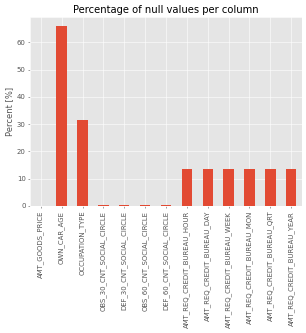

In [11]:
plt.figure(figsize = (7,5),dpi = 50)
NA_col[NA_col > 0].plot(kind = 'bar')
plt.title('Percentage of null values per column')
plt.ylabel('Percent [%]')
plt.show()

### Remove the two colums with high percentage of null values
- OWN_CAR_AGE
- OCCUPATION_TYPE

In [12]:
app = app.drop(['OWN_CAR_AGE','OCCUPATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],axis = 1)

In [13]:
app.shape


(307511, 64)

######  --> 68 columns left

## Clean up Gender Column

In [14]:
app['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [15]:
app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Drop the 4 rows that have the XNA as Gender

In [16]:
print(app.shape)
app = app[app['CODE_GENDER'] != 'XNA']
print(app.shape)

(307511, 64)
(307507, 64)


# Convert times in negative days, to years. 
- replacing the DAYS_BIRTH column to age (in year)
- converting DAYS_EMPLOYED to years
- converting DAYS_REGISTRATION and DAYS_ID_PUBLISHED to years

In [ ]:
app.columns

In [17]:
age = round(app['DAYS_BIRTH'].abs()/365,2)
#app.rename(columns = {'DAYS_BIRTH':'age'},inplace = True)
#app['age']=age

app.rename(columns = {'DAYS_BIRTH':'age','DAYS_EMPLOYED':'employed','DAYS_REGISTRATION':'registration','DAYS_ID_PUBLISHED':'id_pub'}, inplace = True )
app['age']= round(app['age'].abs()/365,2)
app['employed'] = round(app['employed'].abs()/365,2)
app['registration'] = round(app['registration'].abs()/365,2)
app['id_pub'] = round(app['registration'].abs()/365,2)



In [18]:
print(max(app['age']))

69.12


# Check for outliers

In [19]:
columns = ['CNT_CHILDREN','AMT_INCOME_TOTAL',\
     'AMT_CREDIT','AMT_GOODS_PRICE',\
     'REGION_POPULATION_RELATIVE',\
     'age','employed','registration',\
           'id_pub',\
     'HOUR_APPR_PROCESS_START']

app[columns].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,age,employed,registration,id_pub,HOUR_APPR_PROCESS_START
count,307507.000000,3.075070e+05,3.075070e+05,3.072290e+05,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000
mean,0.417047,1.687977e+05,5.990286e+05,5.383977e+05,0.020868,43.937064,185.550275,13.660626,0.037354,12.063394
std,0.722119,2.371246e+05,4.024926e+05,3.694472e+05,0.013831,11.956118,382.041272,9.651733,0.026712,3.265835
min,0.000000,2.565000e+04,4.500000e+04,4.050000e+04,0.000290,20.520000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,0.010006,34.010000,2.560000,5.510000,0.020000,10.000000
50%,0.000000,1.471500e+05,5.135310e+05,4.500000e+05,0.018850,43.150000,6.080000,12.340000,0.030000,12.000000
75%,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,0.028663,53.920000,15.640000,20.490000,0.060000,14.000000
max,19.000000,1.170000e+08,4.050000e+06,4.050000e+06,0.072508,69.120000,1000.670000,67.590000,0.190000,23.000000


#### Box Plot for Children, income, credit, goods value, region, age, employed, registration, id, hour

In [20]:
plt.figure(figsize = (30,30), dpi = 300)
sns.set(font_scale = 2)
for i in enumerate(columns):
    plt.subplot(5,2,i[0]+1)
    b = sns.boxplot(x = i[1], data = app)
    b.set_ylabel(i[1], fontsize = 20)
    b.set_xlabel(i[1], fontsize = 30)
plt.show()


We can see that all columns, except HOURS_APPR_PROCESS_START and AGE have outliers. 


* Children: First qurtile is not there, due to the fact that most data is between 0 and 2.5 and there cannot be negative children. 

* Income has a large outlier. Its removal will drastically improve all analysis. 

* Credit amount and goods also have some outliers. We have to be carefull here, to not remove real data. 

* Time of employment has one large outlier. 

# REMOVE outliers

--> Filter income

In [21]:
filter_income = app[['AMT_INCOME_TOTAL']]
filter_income = filter_income.loc[filter_income.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis = 1)]

In [22]:
print(app.shape)
print(filter_income.shape)
307507 - 306069

(307507, 65)
(306069, 1)


1438

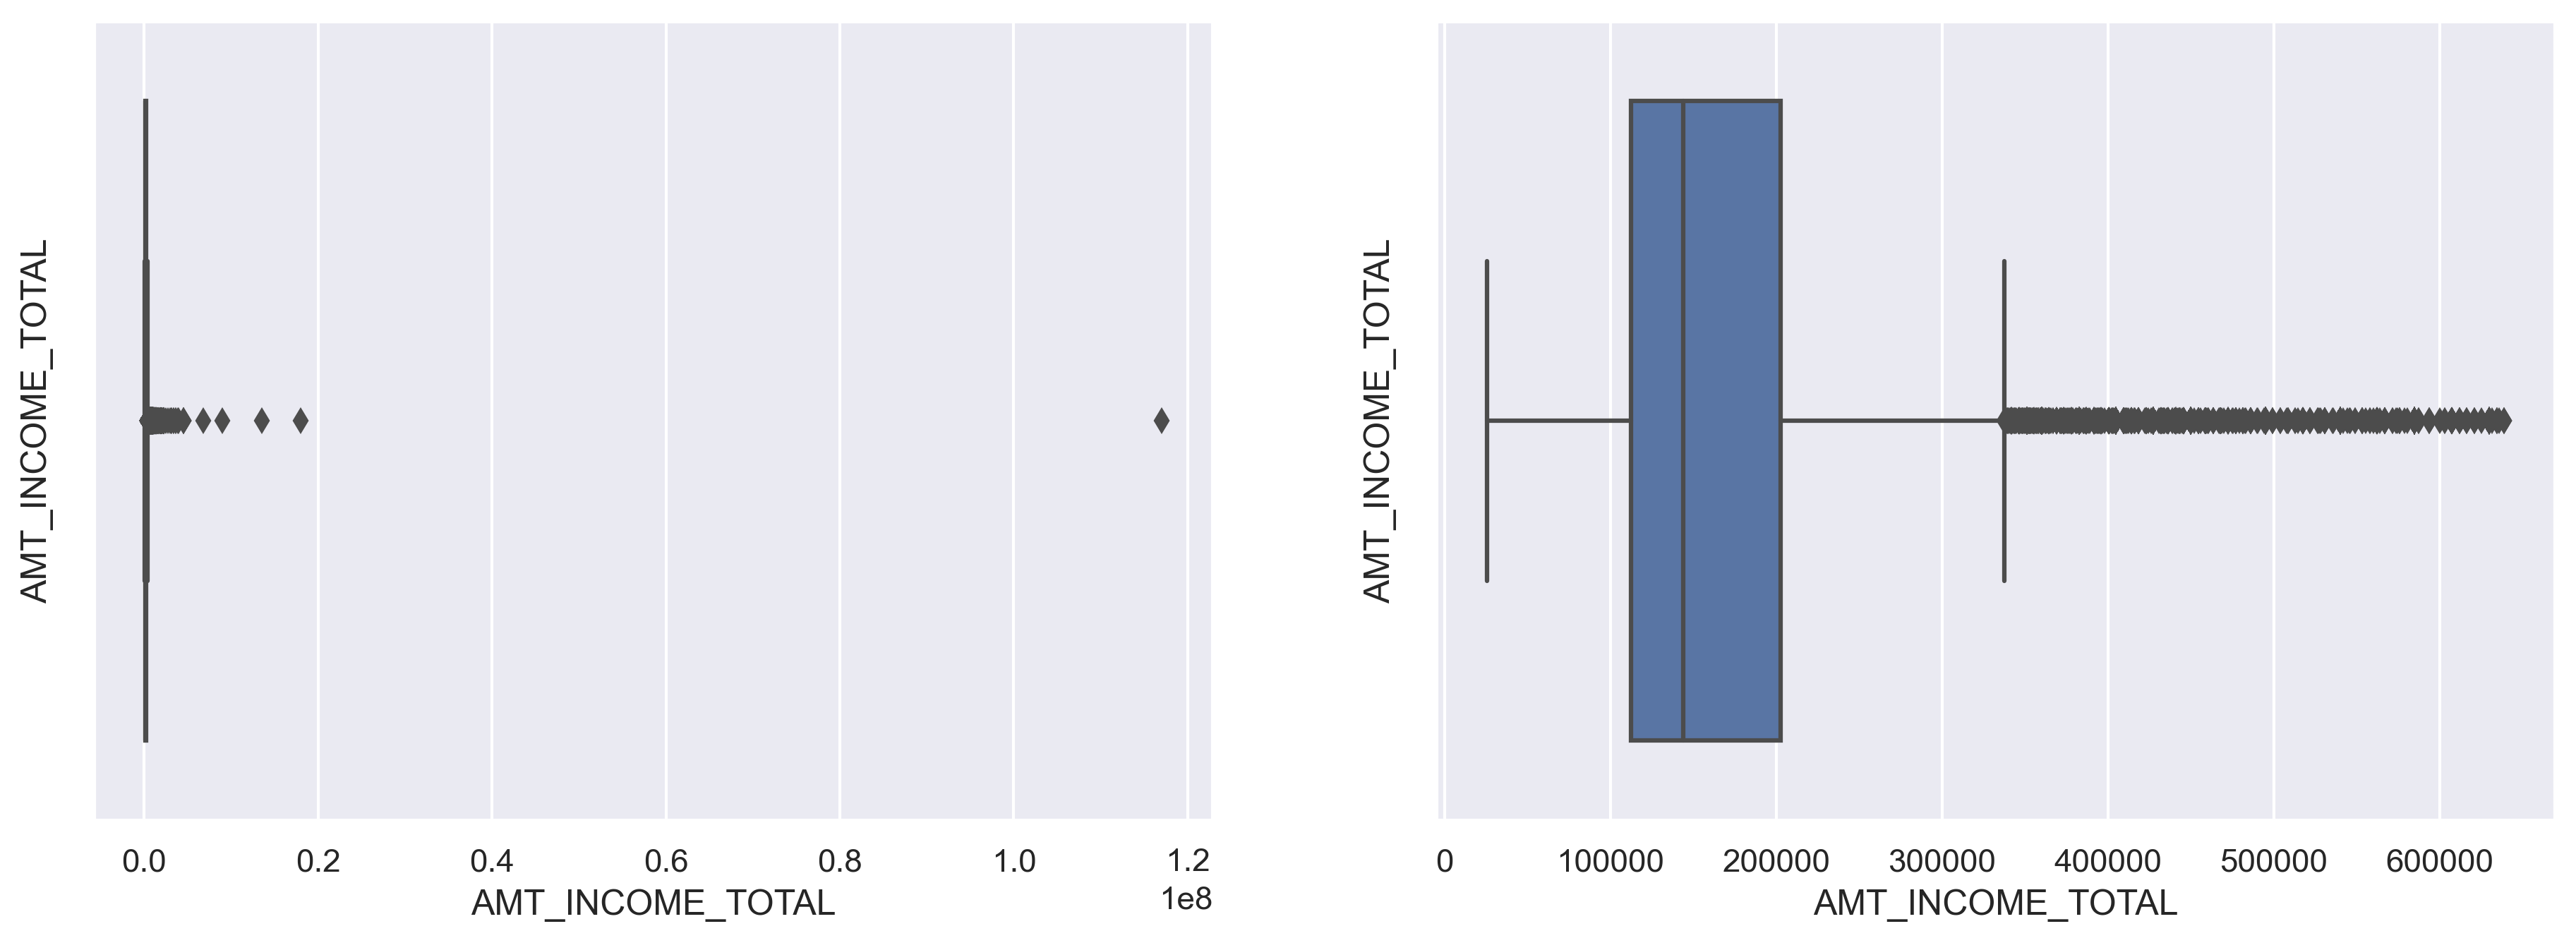

In [23]:
sns.set(font_scale = 1)
plt.figure(figsize = (15,5), dpi = 300)

plt.subplot(1,2,1)
b = sns.boxplot(x = 'AMT_INCOME_TOTAL', data = app)
b.set_ylabel('AMT_INCOME_TOTAL', fontsize = 12)
b.set_xlabel('AMT_INCOME_TOTAL', fontsize = 12)

plt.subplot(1,2,2)
b = sns.boxplot(x = 'AMT_INCOME_TOTAL', data = filter_income)
b.set_ylabel('AMT_INCOME_TOTAL', fontsize = 12)
b.set_xlabel('AMT_INCOME_TOTAL', fontsize = 12)


plt.show()


In [24]:
print('Minimum income before filtering')
print(app['AMT_INCOME_TOTAL'].min())


print('Minimum income AFTER filtering')
print(filter_income['AMT_INCOME_TOTAL'].min())

Minimum income before filtering
25650.0
Minimum income AFTER filtering
25650.0


In [25]:
print('Maximum income before filtering')
print(app['AMT_INCOME_TOTAL'].max())


print('Maximum income AFTER filtering')
print(filter_income['AMT_INCOME_TOTAL'].max())

Maximum income before filtering
117000000.0
Maximum income AFTER filtering
639000.0


--> Filter Credit amount

In [26]:
filter_credit = app[['AMT_CREDIT']]
filter_credit = filter_credit.loc[filter_credit.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis = 1)]

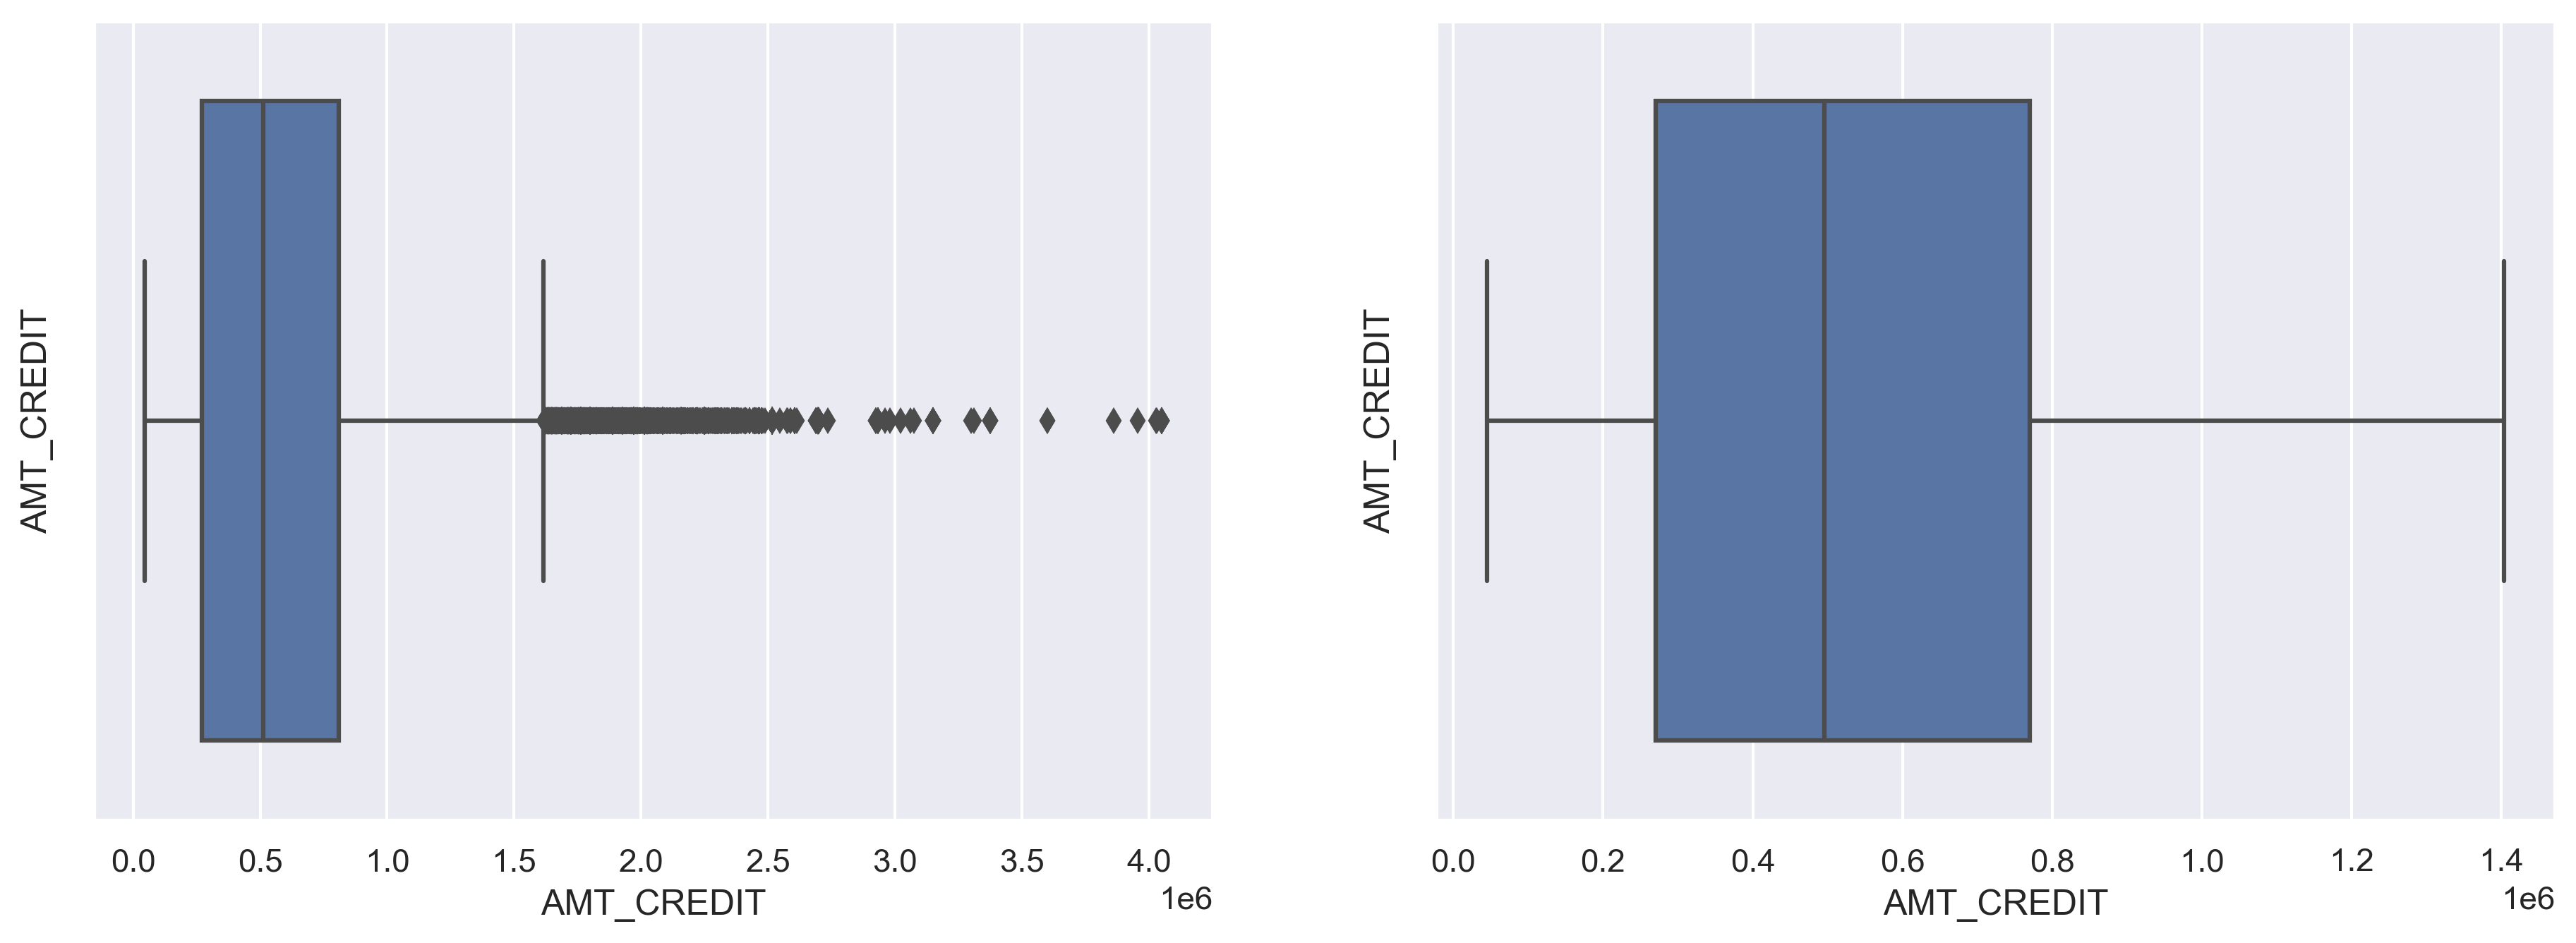

In [27]:
sns.set(font_scale = 1)
plt.figure(figsize = (15,5), dpi = 300)

plt.subplot(1,2,1)
b = sns.boxplot(x = 'AMT_CREDIT', data = app)
b.set_ylabel('AMT_CREDIT', fontsize = 12)
b.set_xlabel('AMT_CREDIT', fontsize = 12)

plt.subplot(1,2,2)
b = sns.boxplot(x = 'AMT_CREDIT', data = filter_credit)
b.set_ylabel('AMT_CREDIT', fontsize = 12)
b.set_xlabel('AMT_CREDIT', fontsize = 12)


plt.show()


In [28]:
print('Minimum credit before filtering')
print(app['AMT_CREDIT'].min())


print('Minimum credit AFTER filtering')
print(filter_credit['AMT_CREDIT'].min())

Minimum credit before filtering
45000.0
Minimum credit AFTER filtering
45000.0


In [29]:
print('Maximum credit before filtering')
print(app['AMT_CREDIT'].max())


print('Maximum credit AFTER filtering')
print(filter_credit['AMT_CREDIT'].max())

Maximum credit before filtering
4050000.0
Maximum credit AFTER filtering
1404013.5


--> AMOUNT OF GOODS

In [30]:
filter_goods = app[['AMT_GOODS_PRICE']]
filter_goods = filter_goods.loc[filter_goods.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis = 1)]

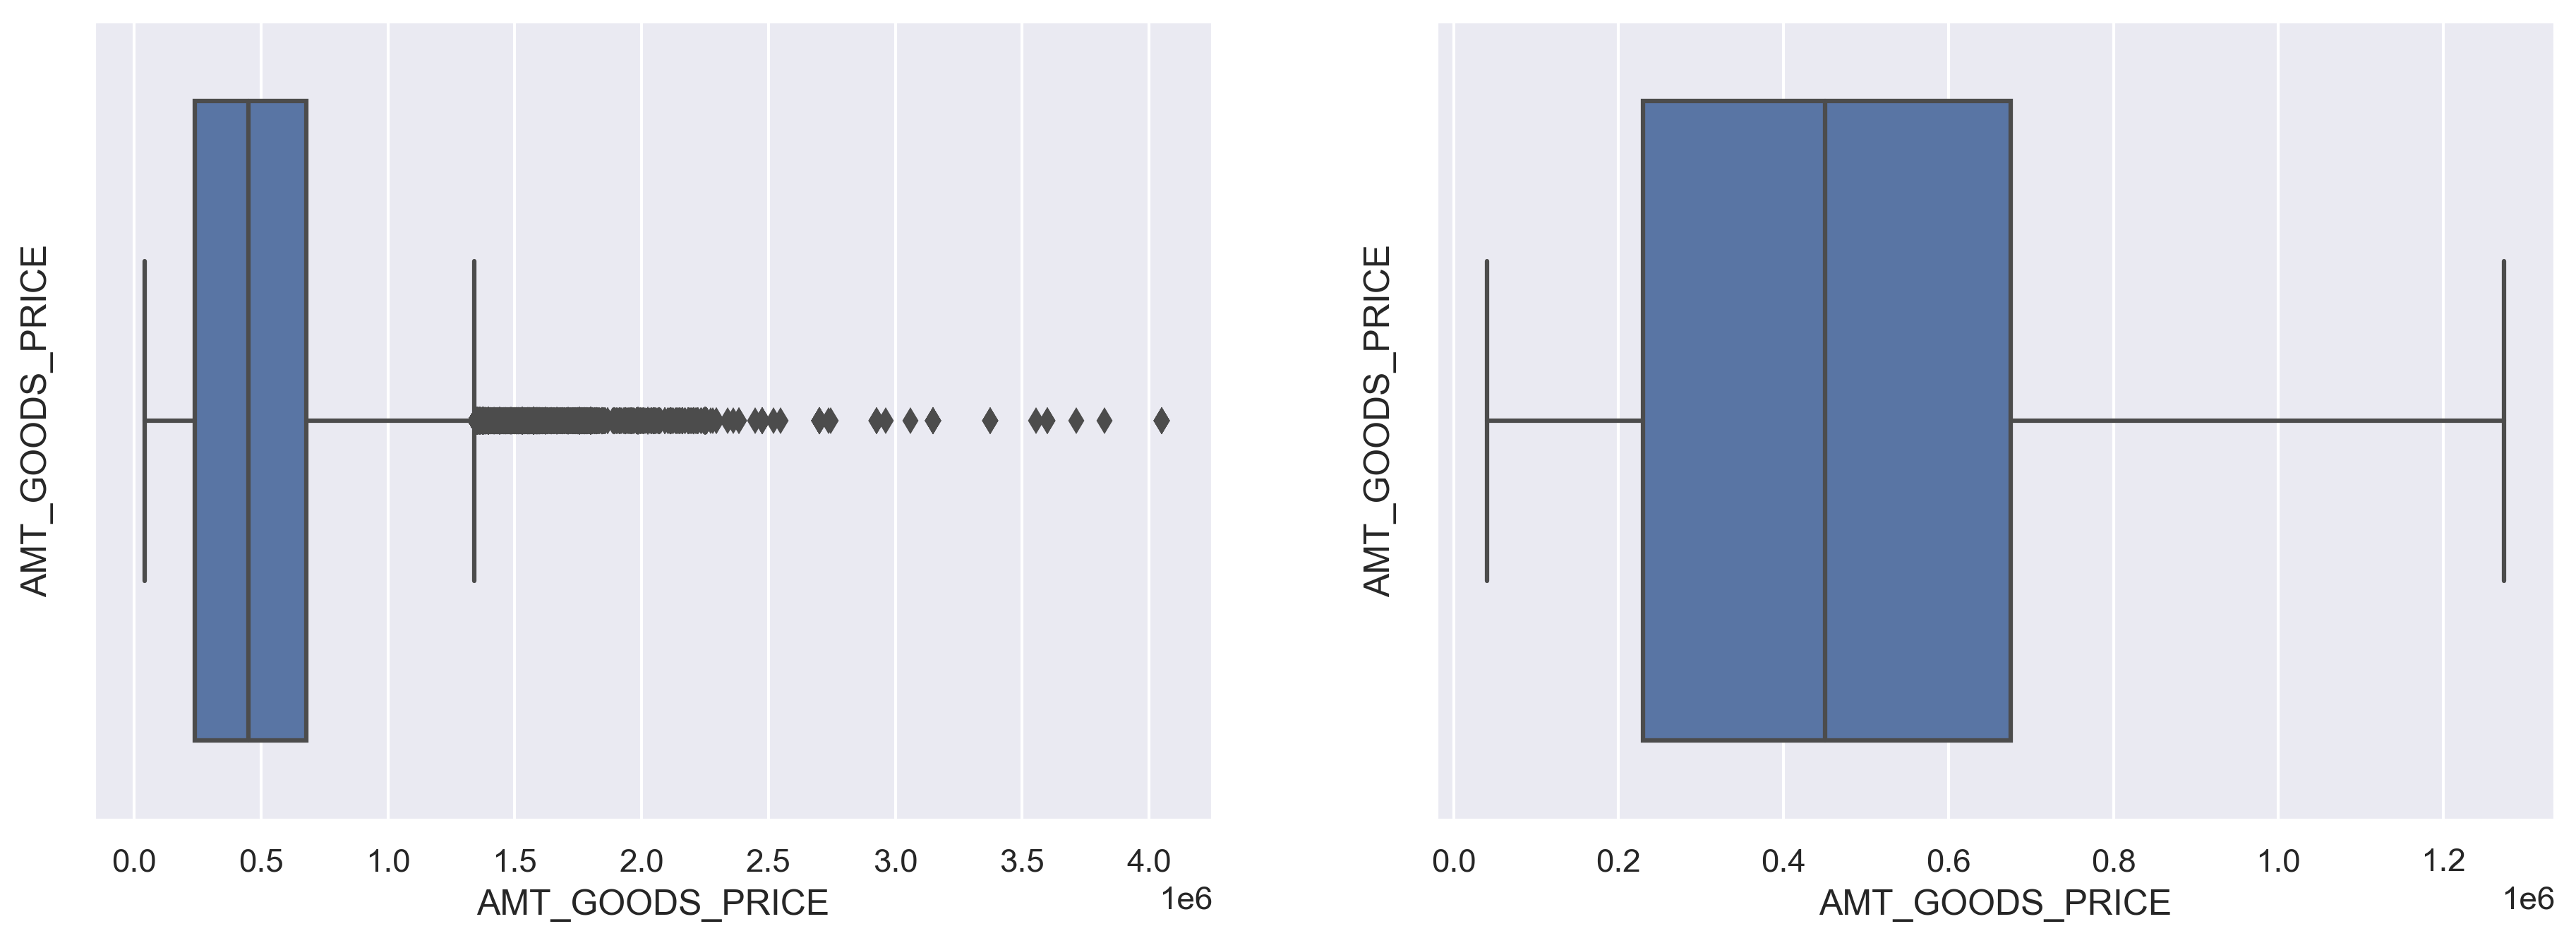

In [31]:
sns.set(font_scale = 1)
plt.figure(figsize = (15,5), dpi = 300)

plt.subplot(1,2,1)
b = sns.boxplot(x = 'AMT_GOODS_PRICE', data = app)
b.set_ylabel('AMT_GOODS_PRICE', fontsize = 12)
b.set_xlabel('AMT_GOODS_PRICE', fontsize = 12)

plt.subplot(1,2,2)
b = sns.boxplot(x = 'AMT_GOODS_PRICE', data = filter_goods)
b.set_ylabel('AMT_GOODS_PRICE', fontsize = 12)
b.set_xlabel('AMT_GOODS_PRICE', fontsize = 12)


plt.show()


In [32]:
print('Minimum credit before filtering')
print(app['AMT_GOODS_PRICE'].min())


print('Minimum credit AFTER filtering')
print(filter_goods['AMT_GOODS_PRICE'].min())

Minimum credit before filtering
40500.0
Minimum credit AFTER filtering
40500.0


In [33]:
print('Maximum credit before filtering')
print(app['AMT_GOODS_PRICE'].max())


print('Maximum credit AFTER filtering')
print(filter_goods['AMT_GOODS_PRICE'].max())

Maximum credit before filtering
4050000.0
Maximum credit AFTER filtering
1273680.0


--> Region index

In [34]:
filter_region = app[['REGION_POPULATION_RELATIVE']]
filter_region = filter_region.loc[filter_region.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis = 1)]

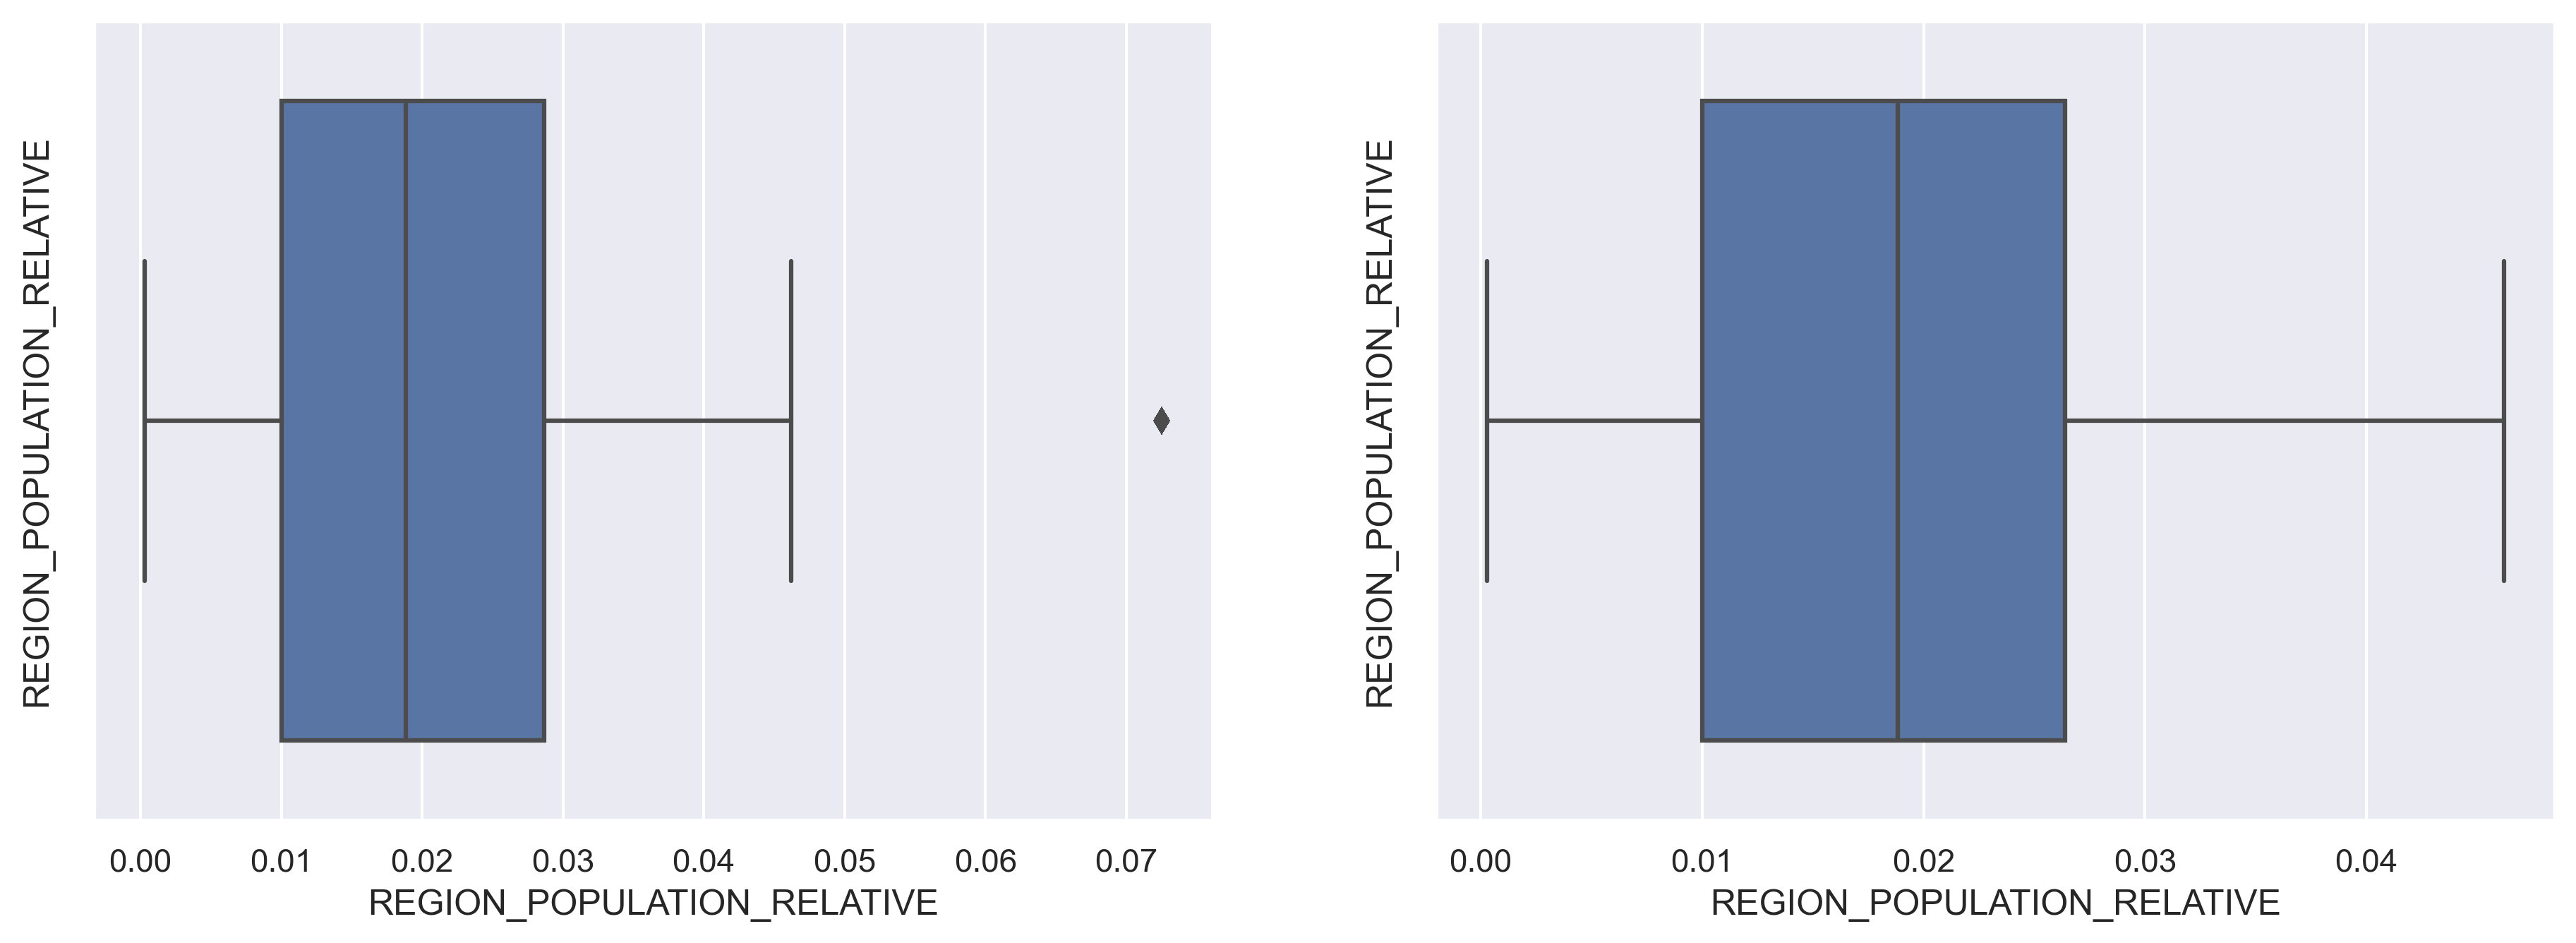

In [35]:
sns.set(font_scale = 1)
plt.figure(figsize = (15,5), dpi = 300)

plt.subplot(1,2,1)
b = sns.boxplot(x = 'REGION_POPULATION_RELATIVE', data = app)
b.set_ylabel('REGION_POPULATION_RELATIVE', fontsize = 12)
b.set_xlabel('REGION_POPULATION_RELATIVE', fontsize = 12)

plt.subplot(1,2,2)
b = sns.boxplot(x = 'REGION_POPULATION_RELATIVE', data = filter_region)
b.set_ylabel('REGION_POPULATION_RELATIVE', fontsize = 12)
b.set_xlabel('REGION_POPULATION_RELATIVE', fontsize = 12)


plt.show()

In [36]:
print('Minimum region rating before filtering')
print(app['REGION_POPULATION_RELATIVE'].min())


print('Minimum region rating AFTER filtering')
print(filter_region['REGION_POPULATION_RELATIVE'].min())

Minimum region rating before filtering
0.00029
Minimum region rating AFTER filtering
0.00029


In [37]:
print('Maximum region rating before filtering')
print(app['REGION_POPULATION_RELATIVE'].max())


print('Maximum region rating AFTER filtering')
print(filter_region['REGION_POPULATION_RELATIVE'].max())

Maximum region rating before filtering
0.072508
Maximum region rating AFTER filtering
0.04622


--> TIME OF EMPLOYMENT

In [38]:
filter_empl = app[['employed']]
filter_empl = filter_empl.loc[filter_empl.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis = 1)]

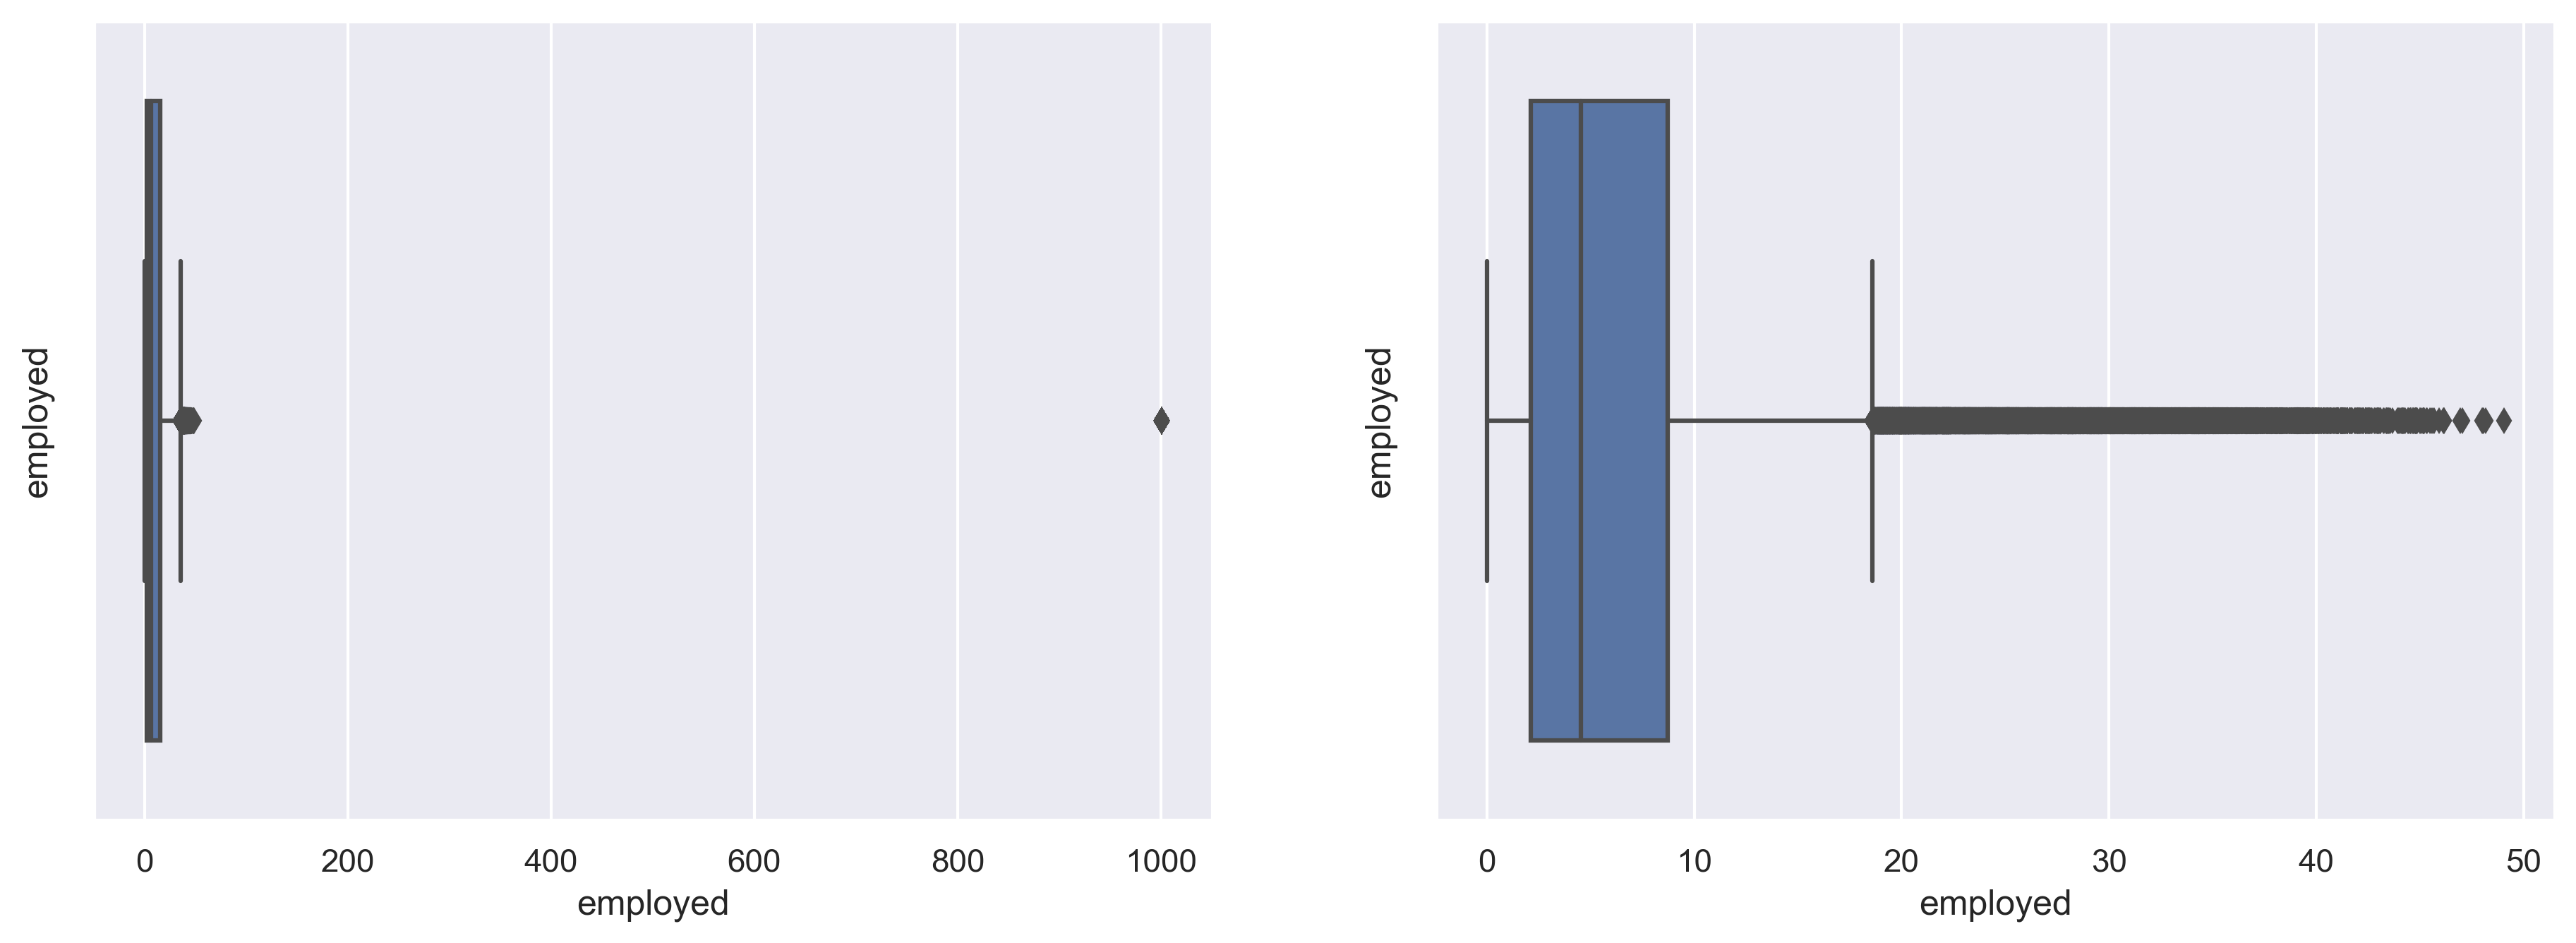

In [39]:
sns.set(font_scale = 1)
plt.figure(figsize = (15,5), dpi = 300)

plt.subplot(1,2,1)
b = sns.boxplot(x = 'employed', data = app)
b.set_ylabel('employed', fontsize = 12)
b.set_xlabel('employed', fontsize = 12)

plt.subplot(1,2,2)
b = sns.boxplot(x = 'employed', data = filter_empl)
b.set_ylabel('employed', fontsize = 12)
b.set_xlabel('employed', fontsize = 12)


plt.show()

In [40]:
print('Minimum years of employment before filtering')
print(app['employed'].min())


print('Minimum years of employment AFTER filtering')
print(filter_empl['employed'].min())

Minimum years of employment before filtering
0.0
Minimum years of employment AFTER filtering
0.0


In [41]:
print('Maximum years of employment before filtering')
print(app['employed'].max())


print('Maximum years of employment AFTER filtering')
print(filter_empl['employed'].max())

Maximum years of employment before filtering
1000.67
Maximum years of employment AFTER filtering
49.07


### Boxplot for all again

In [42]:
plt.figure(figsize = (30,30), dpi = 300)
sns.set(font_scale = 2)

plt.subplot(5,2,1)
b = sns.boxplot(x = 'CNT_CHILDREN', data = app)
b.set_ylabel('CNT_CHILDREN', fontsize = 20)
b.set_xlabel('CNT_CHILDREN', fontsize = 30)


plt.subplot(5,2,2)
b = sns.boxplot(x = 'AMT_INCOME_TOTAL', data = filter_income)
b.set_ylabel('AMT_INCOME_TOTAL', fontsize = 12)
b.set_xlabel('AMT_INCOME_TOTAL', fontsize = 12)


plt.subplot(5,2,3)
b = sns.boxplot(x = 'AMT_CREDIT', data = filter_credit)
b.set_ylabel('AMT_CREDIT', fontsize = 12)
b.set_xlabel('AMT_CREDIT', fontsize = 12)


plt.subplot(5,2,4)
b = sns.boxplot(x = 'AMT_GOODS_PRICE', data = filter_goods)
b.set_ylabel('AMT_GOODS_PRICE', fontsize = 12)
b.set_xlabel('AMT_GOODS_PRICE', fontsize = 12)



plt.subplot(5,2,5)
b = sns.boxplot(x = 'REGION_POPULATION_RELATIVE', data = filter_region)
b.set_ylabel('REGION_POPULATION_RELATIVE', fontsize = 12)
b.set_xlabel('REGION_POPULATION_RELATIVE', fontsize = 12)



plt.subplot(5,2,6)
b = sns.boxplot(x = 'age', data = app)
b.set_ylabel('age', fontsize = 20)
b.set_xlabel('age', fontsize = 30)


plt.subplot(5,2,7)
b = sns.boxplot(x = 'employed', data = filter_empl)
b.set_ylabel('employed', fontsize = 12)
b.set_xlabel('employed', fontsize = 12)


plt.subplot(5,2,8)
b = sns.boxplot(x = 'registration', data = app)
b.set_ylabel('registration', fontsize = 20)
b.set_xlabel('registration', fontsize = 30)


plt.subplot(5,2,9)
b = sns.boxplot(x = 'id_pub', data = app)
b.set_ylabel('id_pub', fontsize = 20)
b.set_xlabel('id_pub', fontsize = 30)


plt.subplot(5,2,10)
b = sns.boxplot(x = 'HOUR_APPR_PROCESS_START', data = app)
b.set_ylabel('HOUR_APPR_PROCESS_START', fontsize = 20)
b.set_xlabel('HOUR_APPR_PROCESS_START', fontsize = 30)

    
plt.show()



#### Remove rows with outliers

In [43]:
print(app.shape)
print(filter_credit.shape)

(307507, 65)
(294512, 1)


In [ ]:
#filter_df = app[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','employed']]
#z = np.abs(stats.zscore(filter_df))
#outliers_income = np.where(z > 3)

#app.drop(app.index[outliers[0]],axis = 0)

In [44]:
filter_df = app[['AMT_INCOME_TOTAL']]
z = np.abs(stats.zscore(filter_df))
outliers_income = np.where(z > 2)


filter_df = app[['AMT_CREDIT']]
z = np.abs(stats.zscore(filter_df))
outliers_credit = np.where(z > 2)


filter_df = app[['AMT_GOODS_PRICE']]
z = np.abs(stats.zscore(filter_df))
outliers_goods = np.where(z > 2)


filter_df = app[['REGION_POPULATION_RELATIVE']]
z = np.abs(stats.zscore(filter_df))
outliers_region = np.where(z > 2)


filter_df = app[['employed']]
z = np.abs(stats.zscore(filter_df))
outliers_empl = np.where(z > 2)


In [45]:
#out = outliers_income[0]
#type(out)

#a = np.array([1, 2, 3, 4])
#b = np.array([4, 5])
#c = np.unique(np.concatenate((a, b), axis=0),0)
#c
comb_outliers = np.unique(np.concatenate((outliers_income[0], outliers_credit[0],outliers_goods[0], outliers_region[0], outliers_empl[0]), axis =0),0)

#print(outliers_income[0].shape)
#print(outliers_credit[0].shape)
#print(outliers_goods[0].shape)
#print(outliers_region[0].shape)
#print(outliers_empl[0].shape)


#print(comb_outliers.shape)
type(comb_outliers)

app_filter = app.drop(app.index[comb_outliers],axis = 0)
#print(app_filter.shape)

#307507 - comb_outliers.shape[0]

In [46]:
plt.figure(figsize = (30,30), dpi = 300)
sns.set(font_scale = 2)
for i in enumerate(columns):
    plt.subplot(5,2,i[0]+1)
    b = sns.boxplot(x = i[1], data = app_filter)
    b.set_ylabel(i[1], fontsize = 20)
    b.set_xlabel(i[1], fontsize = 30)
plt.show()


# Create Income, Credit, and Goods Ranges

Creating bins for continous variables, income, credit and goods 

In [47]:
#print(min(app_filter['AMT_INCOME_TOTAL']))
#print(max(app_filter['AMT_INCOME_TOTAL']))
#bins = [0,30000,50000,70000,90000,110000,150000,200000,300000,10000000]

#slot = ['<30000', '30000-50000','50000-70000','70000-90000',\
#        '90000-110000', '110000-150000', '150000-200000',\
#        '200000-300000', '>300000']

bins = [0,35000,55000,100000,350000,1000000000]
slot = ['Low income','lower-middle class','middle class','upper-middle class','upper class']
app_filter['AMT_INCOME_RANGE']=pd.cut(app_filter['AMT_INCOME_TOTAL'],bins,labels=slot)

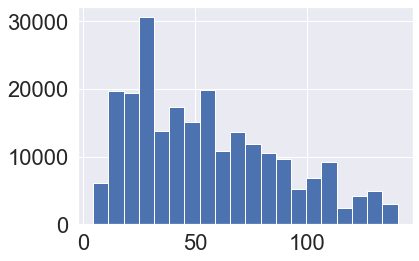

In [50]:

plt.hist(app_filter['AMT_CREDIT']/10000, bins = 20)


bins = [0,50000,100000,150000,200000,300000,500000,1000000,100000000000]

slot = ['<50000', '50000-100000','100000-150000','150000-200000',\
        '200000-300000', '300000-500000', '500000-1000000',\
        '>1000000']

app_filter['AMT_CREDIT_RANGE'] = pd.cut(app_filter['AMT_CREDIT'],bins,labels = slot)
app_filter['AMT_GOODS_RANGE'] = pd.cut(app_filter['AMT_GOODS_PRICE'],bins,labels = slot)



Create age, time of employment, time of ID bins

In [ ]:
print(min(app_filter['age']))
print(max(app_filter['age']))
#bins = [20,25,30,35,40,45,50,55,60,65,70]

#slot = ['<25', '25-30','30-35','35-40',\
#        '40-45', '45-50', '50-55',\
#        '55-60', '60-65','>65']

bins = [0,30,45,60,100]
slot = ['<30','30-45','45-60','>60']
app_filter['age_range'] = pd.cut(app_filter['age'],bins,labels = slot)
app_filter['employment_range'] = pd.cut(app_filter['employed'],bins,labels = slot)
app_filter['id_pub_range'] = pd.cut(app_filter['id_pub'],bins,labels = slot)

In [ ]:
app_filter.columns

# Rename columns for easier use. 

In [ ]:
col = {'SK_ID_CURR':'id_curr', 'TARGET': 'target', 'NAME_CONTRACT_TYPE': 'credit_type',\
       'CODE_GENDER': 'gender', 'FLAG_OWN_CAR': 'fcar', 'FLAG_OWN_REALTY': 'frealty',\
       'CNT_CHILDREN':'kids', 'AMT_INCOME_TOTAL':'income', 'AMT_CREDIT':'credit',\
       'AMT_ANNUITY':'annuity', 'AMT_GOODS_PRICE':'goods', 'NAME_INCOME_TYPE' : 'income_type',\
       'NAME_EDUCATION_TYPE':'education', 'NAME_FAMILY_STATUS': 'family_status',\
       'NAME_HOUSING_TYPE': 'housing', 'REGION_POPULATION_RELATIVE': 'pop_relative',\
       'DAYS_ID_PUBLISH': 'id_pub', 'FLAG_MOBIL':'fmobile', 'FLAG_EMP_PHONE':'femp_phone',\
       'FLAG_WORK_PHONE':'fwork_phone', 'FLAG_CONT_MOBILE':'freach_phone', 'FLAG_PHONE':'fphone',\
       'FLAG_EMAIL':'femail', 'CNT_FAM_MEMBERS':'fam_members', 'REGION_RATING_CLIENT_W_CITY':'region_rating',\
       'WEEKDAY_APPR_PROCESS_START':'weekday', 'HOUR_APPR_PROCESS_START':'hour', \
       'REG_REGION_NOT_LIVE_REGION':'reg_not_live', 'REG_REGION_NOT_WORK_REGION':'reg_not_work',\
       'LIVE_REGION_NOT_WORK_REGION':'live_not_work', 'REG_CITY_NOT_LIVE_CITY':'regvity_not_livecity',\
       'REG_CITY_NOT_WORK_CITY':'regcity_not_workcity', 'LIVE_CITY_NOT_WORK_CITY':'livecity_not_workcity',\
       'ORGANIZATION_TYPE':'worktype', 'DAYS_LAST_PHONE_CHANGE':'phone_change', 'FLAG_DOCUMENT_2':'d2',\
       'FLAG_DOCUMENT_3':'d3', 'FLAG_DOCUMENT_4':'d4', 'FLAG_DOCUMENT_5':'d5', 'FLAG_DOCUMENT_6':'d6',\
       'FLAG_DOCUMENT_7':'d7', 'FLAG_DOCUMENT_8':'d8', 'FLAG_DOCUMENT_9':'d9','FLAG_DOCUMENT_10':'d10',\
       'FLAG_DOCUMENT_11':'d11', 'FLAG_DOCUMENT_12':'d12', 'FLAG_DOCUMENT_13': 'd13', 'FLAG_DOCUMENT_14':'d14',\
       'FLAG_DOCUMENT_15':'d15', 'FLAG_DOCUMENT_16':'d16', 'FLAG_DOCUMENT_17':'d17', 'FLAG_DOCUMENT_18':'d18',\
       'FLAG_DOCUMENT_19':'d19', 'FLAG_DOCUMENT_20':'d20', 'FLAG_DOCUMENT_21':'d21', 'AMT_CREDIT_RANGE':'credit_range',\
       'AMT_INCOME_RANGE':'income_range', 'AMT_GOODS_RANGE':'goods_range'}

app_filter = app_filter.rename(columns = col)

app_filter.columns

## Men and women

In [ ]:
men = app_filter[app_filter['gender'] == 'M']
print(men.shape)
women = app_filter[app_filter['gender'] == 'F']
print(women.shape)

print(app_filter.shape)

women.shape[0] + men.shape[0]

## Target 1 or Target 0

In [ ]:
target1 = app_filter[app_filter['target'] == 1]
print(target1.shape)
target0 = app_filter[app_filter['target'] == 0]
print(target0.shape)

print(target1.shape[0] + target0.shape[0])
print(app_filter.shape)